# Big Picture

### HARD VOTING VS SOFT VOTING

Hard voting is a simple way of creating an aggregate classifier. It takes the predictions of each classifier and aggregates all those votes. Then it predicts the class by choosing the class that got the most votes from all of the other classifiers. This is pretty much like a majority rules voting system. Soft voting is a bit different in that it is not a cut and dry as hard voting. In soft voting you need to make sure that all of the classifiers are able to estimate class probabilities. Rather than taking an aggregate of the votes, soft voting averages the class probabilities and predicts the class that has the highest average class probability. It often outperforms hard voting because it gives more weight to confident votes.

# Selecting the Data

The data that I chose to use this time was a glass data set. I was a little intrigued with why someone would make a glass data set but then I realized that there could be specific niches uses for classifying glass, like crime scene analysis. 

URL: https://www.kaggle.com/uciml/glass

In [213]:
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot') # Have a nicer style of the plots

glass = pd.read_csv('glass.csv')

In [214]:
import os
size = os.path.getsize('glass.csv')
size

10053

The file for the glass data set is 10 KB

In [215]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


There are 214 entries in the data set. There are 10 columns with 9 of them being features and the final column being the type of glass. The features are the refractive index and the weight percent of the following elements: Sodium, Magnesium, Aluminum, Silicon, Potassium, Calcium, Barium, and Iron. I am going to change the Type column a little bit to make it binary by making window glass have a value of 1 and everything else have a value of 0

In [216]:
glass.Type = np.where(glass.Type <= 4, 1, glass.Type)
glass.Type = np.where(glass.Type > 4, 0, glass.Type)

In [217]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [218]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.761682
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,1.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,1.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


Looking at a snapshot of the data we can see that there is no missing data. We can see basic statistics on all of the numerical data and nothing seems to be out of the ordinary there. We can start to see a little about how glass is normally made. We see that silicon is a big part of the make up of almost all glass and also calcium and that other elements only really show up as trace ammounts.

# Non-linear Separation Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002571ECB8710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002571FFFDDD8>]], dtype=object)

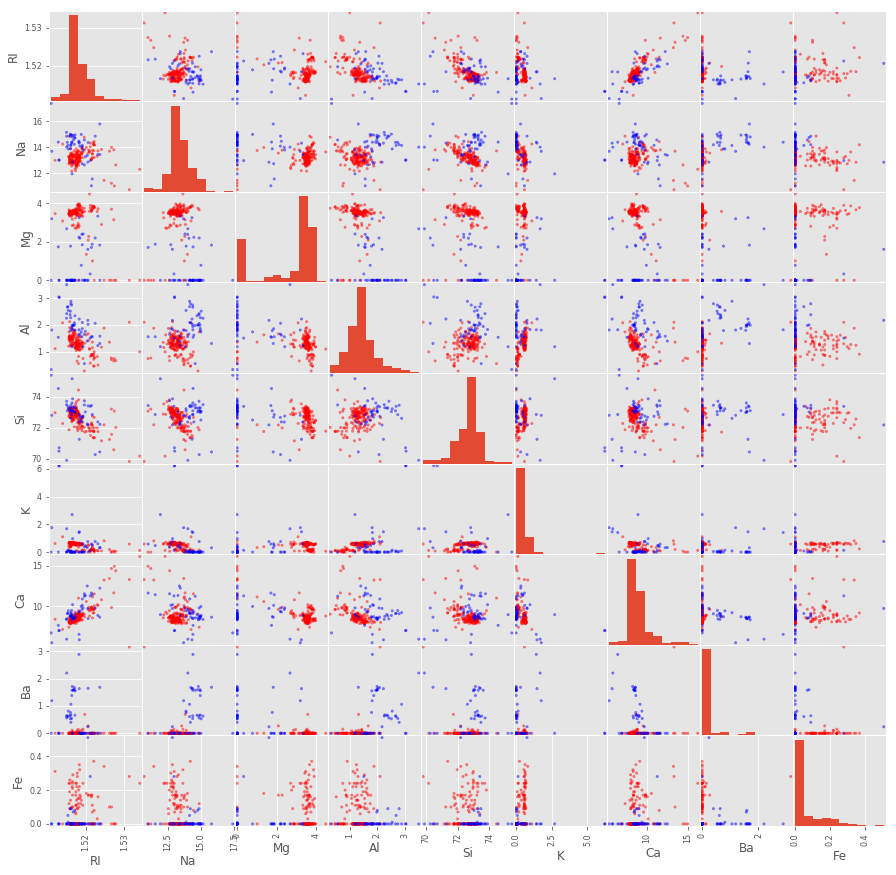

In [219]:
from pandas.plotting import scatter_matrix
columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
label = glass['Type']
color = ['red' if l == 1 else 'blue' for l in label]
data = pd.DataFrame(glass, columns=columns)
scatter_matrix(data,c=color,figsize=(15,15))

Looking at the scatter plots of the feature pairs in our data set we can see that there is not really any strong linear separation between window glass (red) and not window glass (blue). We are working with pretty non-linearly separable data.

# Selecting a Base Classifier

In [296]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(glass)

x_train = train_set.drop(['Type'], axis=1)
y_train = train_set['Type']
x_test = test_set.drop(['Type'], axis=1)
y_test = test_set['Type']

In [297]:
from sklearn import tree
base = tree.DecisionTreeClassifier(max_depth=1)
base.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [298]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(base, x_test, y_test, cv=3)

In [299]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
confusion_matrix(y_test, y_test_pred)

array([[11,  2],
       [ 4, 37]], dtype=int64)

In [300]:
precision_score(y_test,y_test_pred)

0.94871794871794868

In [301]:
recall_score(y_test,y_test_pred)

0.90243902439024393

In [302]:
f1_score(y_test,y_test_pred)

0.92499999999999993

In [303]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_pred)

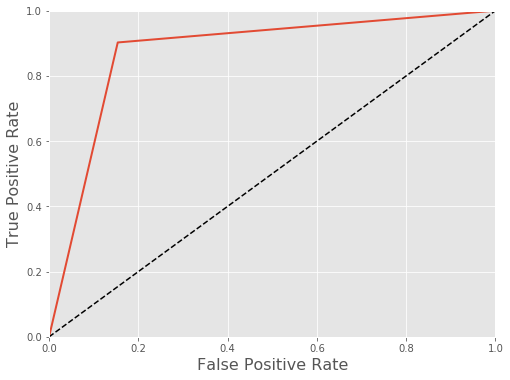

In [304]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [305]:
roc_auc_score(y_test,y_test_pred)

0.87429643527204493

For my base classifier I chose to use a decision tree with only one split (max_depth = 1). The classifier has pretty good performance with an F-1 score of about .90, but it could be improved upon.

# Ensemble Classifiers

## Bagging

In [306]:
from sklearn import ensemble
bag = ensemble.BaggingClassifier(base_estimator=base)
bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [307]:
y_test_pred = cross_val_predict(bag, x_test, y_test, cv=3)

In [308]:
confusion_matrix(y_test,y_test_pred)

array([[ 8,  5],
       [ 4, 37]], dtype=int64)

In [309]:
precision_score(y_test,y_test_pred)

0.88095238095238093

In [310]:
recall_score(y_test,y_test_pred)

0.90243902439024393

In [311]:
f1_score(y_test,y_test_pred)

0.89156626506024106

In [312]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_pred)

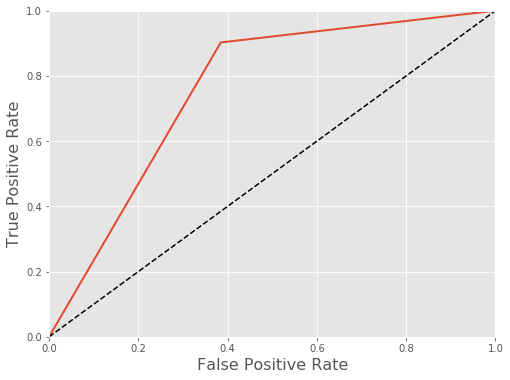

In [313]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [314]:
roc_auc_score(y_test,y_test_pred)

0.75891181988742962

## Random Forest

In [315]:
forest = ensemble.RandomForestClassifier()
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [316]:
y_test_pred = cross_val_predict(forest, x_test, y_test, cv=3)

In [317]:
confusion_matrix(y_test,y_test_pred)

array([[ 9,  4],
       [ 1, 40]], dtype=int64)

In [318]:
precision_score(y_test,y_test_pred)

0.90909090909090906

In [319]:
recall_score(y_test,y_test_pred)

0.97560975609756095

In [320]:
f1_score(y_test,y_test_pred)

0.94117647058823517

In [321]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_pred)

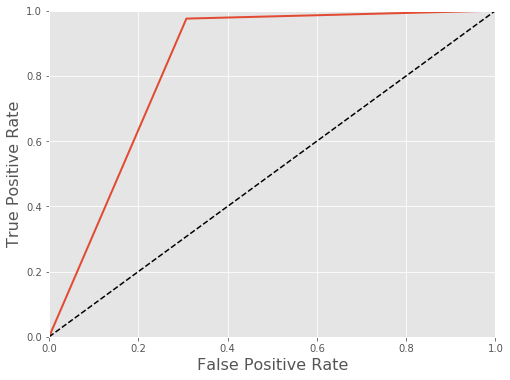

In [322]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [323]:
roc_auc_score(y_test,y_test_pred)

0.83395872420262662

# AdaBoost

In [324]:
ada = ensemble.AdaBoostClassifier(base_estimator=base)
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [325]:
y_test_pred = cross_val_predict(ada, x_test, y_test, cv=3)

In [326]:
confusion_matrix(y_test,y_test_pred)

array([[ 7,  6],
       [ 3, 38]], dtype=int64)

In [327]:
precision_score(y_test,y_test_pred)

0.86363636363636365

In [328]:
recall_score(y_test,y_test_pred)

0.92682926829268297

In [329]:
f1_score(y_test,y_test_pred)

0.89411764705882357

In [330]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_pred)

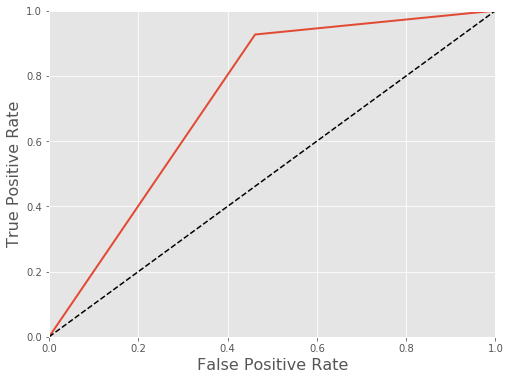

In [331]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [332]:
roc_auc_score(y_test,y_test_pred)

0.7326454033771107

## Results

There really isn't a clear winner for which of these ensemble classifiers performs the best. After runnning it a couple different times on different test-train splits, I have tended to see better performance from Random Forest, but it is only a marginal improvement. In fact, the improvement from all of the ensemble classifiers over the base classifier is only marginal. This is probably because I have such a small dataset and the base classifier performs particularly well.

# Feature Importance using Random Forest

In [333]:
for name, score in zip(list(glass), forest.feature_importances_):
    print(name, score)

RI 0.0427672892518
Na 0.117693940045
Mg 0.311163757286
Al 0.193081950406
Si 0.0531077057743
K 0.040240867579
Ca 0.0667893189956
Ba 0.151232631735
Fe 0.0239225389269


Feature importance is estimated in the Random Forest classifier by taking the average depth for which the class appears in all the trees in the forest. From using the feature importances variable we can see that the most important variable is Magnesium and after that it is really a toss-up. After running the random forest on different test-train splits I saw very mixed results for what was most important after Magnesium with the most frequent being Aluminum.

# Presenting Solution

## Pitch

The glass data set could be really helpful in the world of crime scene forensics. Many crimes scenes involve broken glass left behind at the scene. In some cases there is glass from multiple sources left at the scene and often it is not apparent what the sources of these glass were. Having to determine what type of glass it is and where it came from can draw out the process of solving a crime. My model seeks to reduce the headaches that detectives endure in trying to identifying glass by providing a classifier that can determine if the glass came from a window or another source from just an elemental breakdown of the glass. This model will help save time for detectives and decrease the amount of time it takes for them to solve a crime.

## What I've Learned

From this project I have learned about what exactly ensemble learning boils down to and how things like bagging, random forest, and adaboost are implemented. I also learned the hard way that ensemble learning is really not that necessary when the base classifer already performs well.

# Future of the System

More Data?

I definitely believe that more data would have been useful in this project. I think that the data set I chose was too small and the features were too predictive of the class. If I were dealing with more data and more features (even unimportant ones), I would have had a harder time with the base classifier and would have seen better improvement with the ensemble classfiers. Not only that but I think that there is more information left behind in the glass at crime scenes that could have made the classification problem even more specific. Maybe there would be a way to tell exactly what type of window glass it was if there was more data to work with.

Future of the system?

I think at the moment the model works well. I do not know enough about glass manufacturing to know exactly how volatile the change in the chemical makeup of glass is so I think it is a safe bet to say that the model will hold up over time. There could be significant breakthroughs in the way that glass is made so this model definitely would not hold up forever.

Satisfied?

Overall, I think I am pretty satisfied in the material that I have learned from this project. I got an introduction into ensemble learning. I implemented some ensemble classifiers and learned about them, but unfortunately I did not see the improvement over the base classifier that I would like to have seen. I don't necessarily think that is a bad thing though. By not having my program perfectly display the pros of ensemble learning, I learned about when it doesn't work as well and I think that insight is even more important than just blindly having it work great the first time.